In [114]:
%pylab inline

import io3d
from pathlib import Path

Populating the interactive namespace from numpy and matplotlib


# Virtual hepatectomy

Merge manual segmentation of left liver with ircad segmentation of the liver. Input data:

* Manual segmentation of left part of the liver with careful segmentation of resection line but no care about the segmentation quality on the liver boundary.

* Manual liver segmentation from ircad

In the fallowing scrip we just combine both this sources into one file with labeling of left and right part of the liver.


In [115]:
ircad_id = "10"
ircad_id = "12"
ircad_id = "11"

In [116]:
pth_left = f"C:/Users/Jirik/lisa_data/ircad{ircad_id}_left.pklz"
pth_liver = f"C:/Users/Jirik/data/medical/orig/3Dircadb1.{ircad_id}/MASKS_DICOM/liver/"
pth_output = f"C:/Users/Jirik/lisa_data/ircad{ircad_id}_liver_LR.pklz"

2020-05-12 14:56:23.841 | DEBUG    | io3d.datareader:Get3DData:146 - file read recognized
2020-05-12 14:56:23.842 | DEBUG    | io3d.datareader:__ReadFromFile:254 - pklz format detected
2020-05-12 14:56:24.791 | DEBUG    | io3d.datareader:Get3DData:166 - dataplus format
2020-05-12 14:56:24.792 | DEBUG    | io3d.datareader:Get3DData:170 - datap keys () : dict_keys(['series_number', 'datadir', 'voxelsize_mm', 'version', 'crinfo', 'segmentation', 'apriori', 'slab', 'orig_shape', 'vessel_tree', 'saved_seeds', 'processing_information', 'experiment_caption', 'lisa_operator_identifier', 'data3d'])
2020-05-12 14:56:24.808 | DEBUG    | io3d.datareader:Get3DData:150 - directory read recognized
2020-05-12 14:56:24.810 | WARNING  | io3d.dcmreaddata:is_dicom_dir:74 - Unable to read dicom file dicomdir.pkl
2020-05-12 14:56:24.811 | WARNING  | io3d.dcmreaddata:is_dicom_dir:75 - File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force r

2020-05-12 14:56:24.938 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 34603008, shape: (512, 512)x132 file C:\Users\Jirik\data\medical\orig\3Dircadb1.11\MASKS_DICOM\liver\image_36
2020-05-12 14:56:24.941 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 34603008, shape: (512, 512)x132 file C:\Users\Jirik\data\medical\orig\3Dircadb1.11\MASKS_DICOM\liver\image_37
2020-05-12 14:56:24.943 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 34603008, shape: (512, 512)x132 file C:\Users\Jirik\data\medical\orig\3Dircadb1.11\MASKS_DICOM\liver\image_38
2020-05-12 14:56:24.946 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 34603008, shape: (512, 512)x132 file C:\Users\Jirik\data\medical\orig\3Dircadb1.11\MASKS_DICOM\liver\image_39
2020-05-12 14:56:24.949 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 34603008, shape: (512, 512)x132 file C:\Users\Jirik\data\medical\orig\3Dircadb1.11\MASKS_DICOM\liver\image_40
2020-05-12 14:56:24.952 | DEBUG    | io3

2020-05-12 14:56:25.049 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 34603008, shape: (512, 512)x132 file C:\Users\Jirik\data\medical\orig\3Dircadb1.11\MASKS_DICOM\liver\image_79
2020-05-12 14:56:25.051 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 34603008, shape: (512, 512)x132 file C:\Users\Jirik\data\medical\orig\3Dircadb1.11\MASKS_DICOM\liver\image_80
2020-05-12 14:56:25.053 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 34603008, shape: (512, 512)x132 file C:\Users\Jirik\data\medical\orig\3Dircadb1.11\MASKS_DICOM\liver\image_81
2020-05-12 14:56:25.057 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 34603008, shape: (512, 512)x132 file C:\Users\Jirik\data\medical\orig\3Dircadb1.11\MASKS_DICOM\liver\image_82
2020-05-12 14:56:25.059 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 34603008, shape: (512, 512)x132 file C:\Users\Jirik\data\medical\orig\3Dircadb1.11\MASKS_DICOM\liver\image_83
2020-05-12 14:56:25.062 | DEBUG    | io3

2020-05-12 14:56:25.195 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 34603008, shape: (512, 512)x132 file C:\Users\Jirik\data\medical\orig\3Dircadb1.11\MASKS_DICOM\liver\image_122
2020-05-12 14:56:25.197 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 34603008, shape: (512, 512)x132 file C:\Users\Jirik\data\medical\orig\3Dircadb1.11\MASKS_DICOM\liver\image_123
2020-05-12 14:56:25.200 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 34603008, shape: (512, 512)x132 file C:\Users\Jirik\data\medical\orig\3Dircadb1.11\MASKS_DICOM\liver\image_124
2020-05-12 14:56:25.202 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 34603008, shape: (512, 512)x132 file C:\Users\Jirik\data\medical\orig\3Dircadb1.11\MASKS_DICOM\liver\image_125
2020-05-12 14:56:25.208 | DEBUG    | io3d.dcmreaddata:get_3Ddata:334 - Data size: 34603008, shape: (512, 512)x132 file C:\Users\Jirik\data\medical\orig\3Dircadb1.11\MASKS_DICOM\liver\image_126
2020-05-12 14:56:25.211 | DEBUG    

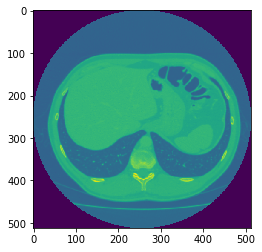

In [117]:
dp_left = io3d.read(pth_left, dataplus_format=True)
dp_liver = io3d.read(pth_liver, dataplus_format=True)
imshow(dp_left["data3d"][30,:,:])

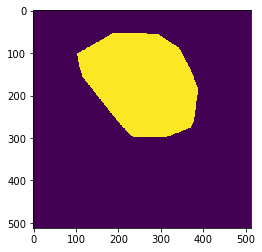

In [118]:

mask_ll = dp_left["segmentation"] == dp_left["slab"]["left_liver"]
imshow(mask_ll[30])
# plt.colorbar()

[  0 255]


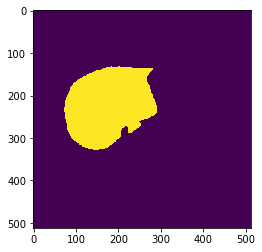

In [119]:
mask_li = dp_liver["data3d"] > 0
print(np.unique(dp_liver["data3d"]))
imshow(mask_li[30])
# plt.colorbar()

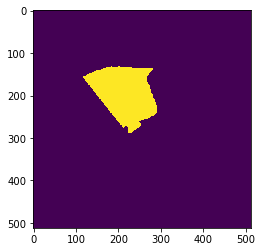

In [120]:
mask_ll_li = mask_li & mask_ll
imshow(mask_ll_li[30])

[  0 128 255]


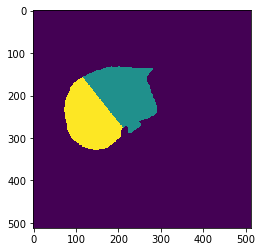

In [121]:
dp_liver["data3d"][dp_liver["data3d"] == 1] = 255
dp_liver["data3d"][mask_ll_li] = 128
print(np.unique(dp_liver["data3d"]))
imshow(dp_liver["data3d"][30])

In [122]:
help(io3d.write)

Help on function write in module io3d.datawriter:

write(data3d, path, filetype='auto', metadata=None)
    :param data3d: input ndarray
    :param path: output path, if braces are in the name ("dir/file{:04d}.dcm"), image stack is produced .
    Check function filename_format() for more details.
    :param filetype: dcm, png, h5, ... "image_stack"
    :param metadata: metadata f.e. {'voxelsize_mm': [3,2,2]}
    :return:



In [123]:
# fn = "ircad10.pklz"
io3d.write(dp_liver["data3d"], pth_output, metadata={"voxelsize_mm":dp_liver["voxelsize_mm"]})


# Check by read

2020-05-12 14:56:27.991 | DEBUG    | io3d.datareader:Get3DData:146 - file read recognized
2020-05-12 14:56:27.992 | DEBUG    | io3d.datareader:__ReadFromFile:254 - pklz format detected
2020-05-12 14:56:28.179 | DEBUG    | io3d.datareader:Get3DData:166 - dataplus format
2020-05-12 14:56:28.180 | DEBUG    | io3d.datareader:Get3DData:170 - datap keys () : dict_keys(['series_number', 'datadir', 'voxelsize_mm', 'data3d'])


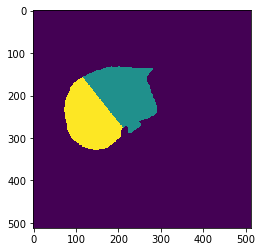

In [124]:
dap = io3d.read(pth_output, dataplus_format=True)

imshow(dap["data3d"][30])

In [125]:
max(0,4)

4